# **Modelo clasificador de imágenes de animales**

## **Descripción General**

Implementar el modelo clasificador de imagenes para el dataset de animalesr, resolviendo y/o editando el codigo para el correcto funcionamiento de este.

### **Estructura del dataset**

El dataset está contenido en el archivo zip Animals, el cual contiene archivos con distintos tipos de animales. Estos archivos contienen los datos de entrada que serían las imágenes de animales.

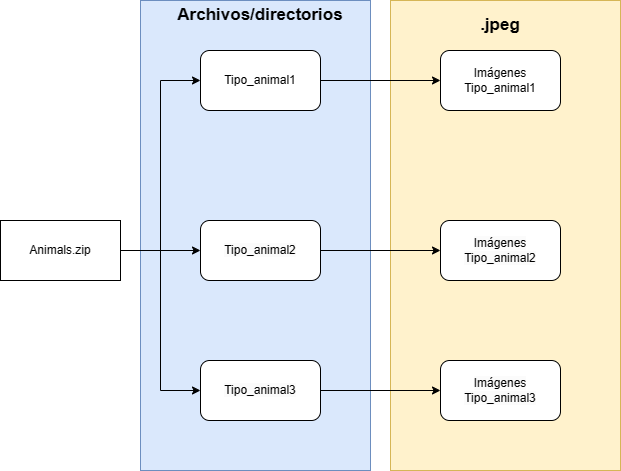

## **Objetivos y Alcances**

### **Objetivos**


*   Implementar clasificador de imágenes con el dataset facilitado
*   Implementar procedimiento para visualizar la matriz de confusión, todas sus métricas
*   Analizar e interpretar métricas
*    Implementar tres acciones de mejoramiento
* Proponer un conjunto de acciones de mejora para diversas estrategias de mejoramiento


### **Alcances**


*   El modelo se entrenará con el dataset de animales facilitado
*   nosexd



## **Carga de Librerias y Dataset**

Este notebook funciona a partir del dataset Animals-10 (https://www.kaggle.com/datasets/alessiocorrado99/animals10?resource=download)

**Montar Google Drive**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Ruta al archivo zip que contiene el conjunto de datos (obtenido de: [Kaggle - Animals-10](https://www.kaggle.com/datasets/alessiocorrado99/animals10?resource=download))**

In [ ]:
file_path = "/content/drive/My Drive/Actividad_IA/Animals.zip"

**Descomprimir el archivo zip**

In [ ]:
import zipfile
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall("/content/dataset")

**Comprobemos el contenido del directorio dataset**

In [ ]:
import os
dataset_dir = "/content/dataset/raw-img"
print(os.listdir(dataset_dir))

['gallina', 'pecora', 'gatto', 'elefante', 'mucca', 'cavallo', 'cane', 'ragno', 'scoiattolo', 'farfalla']


**Importarlas librerias para el análisis exploratorio básico**

In [ ]:
import matplotlib.pyplot as plt
import cv2

**Función para cargar y mostrar imágenes**

In [ ]:
def show_images(directory):
    categories = os.listdir(directory)
    for category in categories:
        path = os.path.join(directory, category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img))
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB
            plt.imshow(img_array)
            plt.title(category)
            plt.axis('off')
            plt.show()
            break  # Solo mostramos una imagen de cada categoría
        break  # Solo mostramos una categoría para mantenerlo conciso

**Mostrar algunas imágenes de ejemplo**

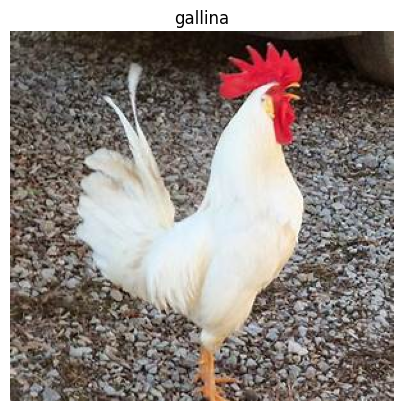

In [ ]:
show_images(dataset_dir)

## Dividir el conjunto de datos en entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split

categories = os.listdir(dataset_dir)
data = []

for category in categories:
    path = os.path.join(dataset_dir, category)
    label = categories.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB
            img_array = cv2.resize(img_array, (100, 100))  # Redimensionar todas las imágenes a 100x100
            data.append([img_array, label])
        except Exception as e:
            pass  # Ignorar imágenes que no se puedan leer

## Dividir el conjunto de datos en características y etiquetas

In [ ]:
import numpy as np

X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)

X = np.array(X)
y = np.array(y)

## Normalizar los datos


In [ ]:
X = X / 255.0

## Dividir el conjunto de datos en entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Construir el modelo CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(64, (3, 3), input_shape=X_train.shape[1:], activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(categories), activation='softmax')  # Usamos softmax para la clasificación multiclase
])

## Compilar el modelo

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Entrenar el modelo

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

## Visualizar las curvas de pérdida y precisión

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
